## Trajectory and Network simulation

In [1]:
from IPython.display import Image, HTML, Latex, YouTubeVideo
import numpy as np
import pylayers.mobility.trajectory as traj
from pylayers.mobility.ban.body import *
from pylayers.gis.layout import *
%matplotlib inline

In [2]:
YouTubeVideo('1Qa6xLpU5-M')

Trajectories can be generated using simulnet.


In [3]:
from pylayers.simul.simulnet import *
S=Simul()

Layout graphs are loaded from /home/uguen/Bureau/P1/struc/ini


In [4]:
# set simulation duration

S.sim_opt['duration']='100'

S.meca_opt['mecanic_update_time']=0.1

# turn on network simulation
S.net_opt['network']=True

In [5]:
# run mechanical simulation
S.runsimul()

trajectories can be imported from a simulnet simulation with the `importh5` method

In [6]:
from pylayers.mobility.trajectory import *

In [7]:
str1 = eval(S.sim_opt['filename'])
str2 = S.L.filename.split('.')[0]
# the save filename is composed of simulation filename and layout filename
save_filename = str1 + '_' + str2 +'.h5'

list_traj = S.traj

In [8]:
list_traj

Trajectories performed in Layout : TA-Office.ini

Trajectory of agent John with ID 1
----------------------------------
t (s) : 0.00 : 0.20 : 99.80
dtot (m) : 375.17
Vmoy (m/s) : 3.76
                                    x         y        vx        vy        ax  \
t                                                                               
1970-01-01 00:00:00         18.907750  2.528547  0.038749  0.155237  0.193744   
1970-01-01 00:00:00.200000  18.921699  2.584433  0.069748  0.279427  0.154995   

                                  ay      s  
t                                            
1970-01-01 00:00:00         0.776185  0.160  
1970-01-01 00:00:00.200000  0.620948  0.448  

Trajectory of agent Alex with ID 2
----------------------------------
t (s) : 0.00 : 0.20 : 99.80
dtot (m) : 359.46
Vmoy (m/s) : 3.60
                                  x       y     vx            vy    ax  \
t                                                                        
1970-01-01 00:00:00     

The 2 following trajectories have been calculated with `pylayers.simul.simulnet`

In [9]:
t=S.traj.resample(10)

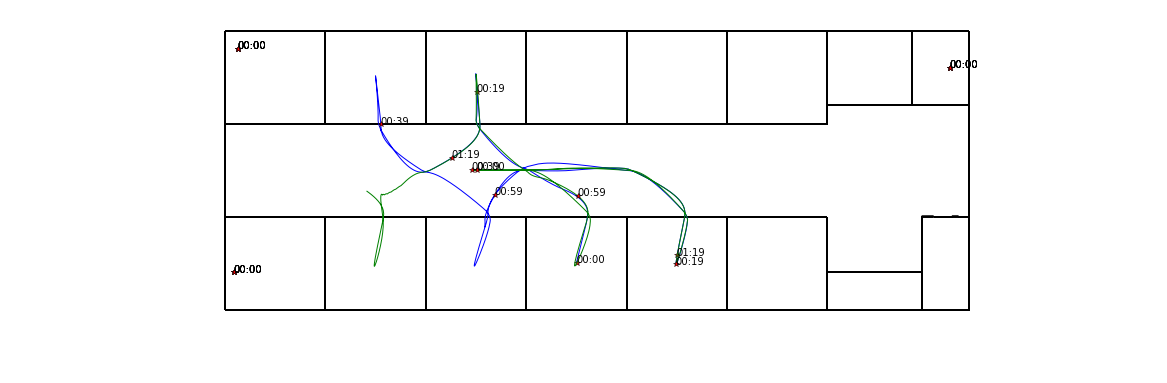

In [10]:
f=plt.figure(figsize=(20,20))
f,a = S.L.showG('s',fig=f)
for nodes in t:
    f,a = nodes.plot(fig=f,ax=a)

In [39]:
len(t.t)

4989

In [40]:
S

Simulation information
----------------------
Layout: TA-Office.ini
Simulation duration: 100
Random seed: 1
Save simulation: True

Update times
-------------
Mechanical update: 0.1
Network update: 0.1
Localization update: 'autonomous'

Agents => self.lAg[i]
------
Number of agents :5
Agents IDs: ['1', '2', '6', '7', '8']
Agents names: ['John', 'Alex', 'Router', 'Router', 'Router']
Destination of chosen agents: 'random'

Network
-------
Nodes per wstd: {'rat1': ['1', '8', '2', '7', '6']}

Localization
------------
Localization enable: False
Postion estimation methods: ['geo']

In [48]:
S.traj.t

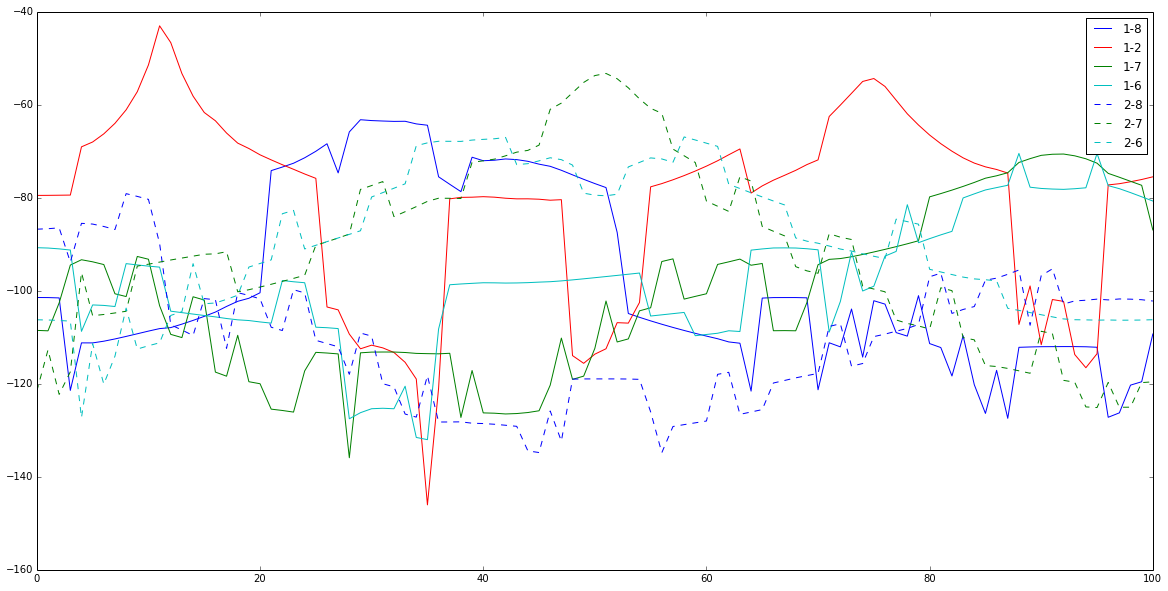

In [41]:
plt.figure(figsize=(20,10))
Rss18 = S.save.save['1']['8']['rat1']['Pr'][:,0]
Rss12 = S.save.save['1']['2']['rat1']['Pr'][:,0]
Rss17 = S.save.save['1']['7']['rat1']['Pr'][:,0]
Rss16 = S.save.save['1']['6']['rat1']['Pr'][:,0]
Rss28 = S.save.save['2']['8']['rat1']['Pr'][:,0]
Rss27 = S.save.save['2']['7']['rat1']['Pr'][:,0]
Rss26 = S.save.save['2']['6']['rat1']['Pr'][:,0]
plt.plot(Rss18,'b',label='1-8')
plt.plot(Rss12,'r',label='1-2')
plt.plot(Rss17,'g',label='1-7')
plt.plot(Rss16,'c',label='1-6')
plt.plot(Rss28,'b--',label='2-8')
plt.plot(Rss27,'g--',label='2-7')
plt.plot(Rss26,'c--',label='2-6')
plt.legend()

In [ ]:
from IPython.core.display import HTML

def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()